### OpenCV의 이미지와 영상 처리

* Python에서 사용되는 여러 image라이브러리를 간단히 살펴보고 OpenCV와의 차이 이해
* OpenCV의 단일 이미지 처리 방식 이해 
* OpenCV의 비디오 영상 처리 방식 이해

#### OpenCV 이미지 처리 이해 및 타 패키지 비교

#### PIL 패키지를 이용하여 이미지 로드하기

image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


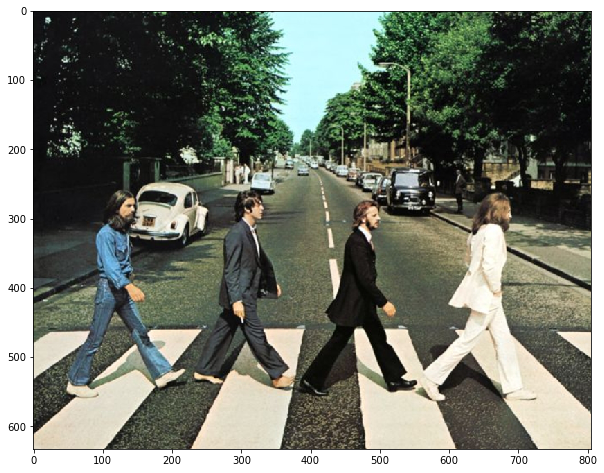

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

# PIL은 oepn()으로 image file을 읽어서 ImageFile객체로 생성. 
pil_image = Image.open("../../data/image/beatles01.jpg")
print('image type:', type(pil_image))

plt.figure(figsize=(10, 10))
plt.imshow(pil_image)
#plt.show()

#### skimage(사이킷이미지)로 이미지 로드 하기
* skimage는 imread()를 이용하여 RGB 원본 이미지를 RGB 형태의 넘파이 배열로 반환함.  

sk_image type: <class 'numpy.ndarray'>  sk_image shape: (633, 806, 3)


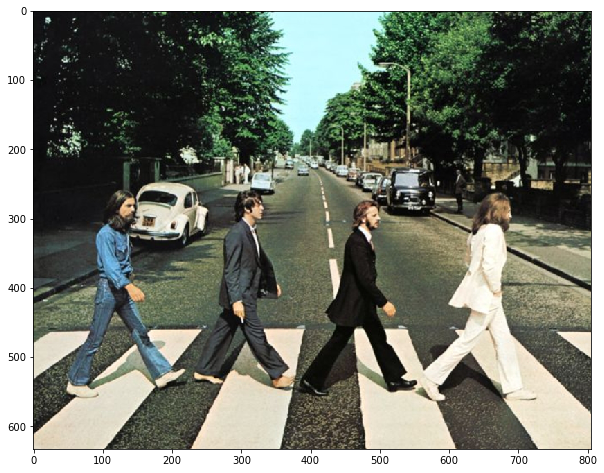

In [2]:
from skimage import io

#skimage는 imread()를 이용하여 image를 numpy 배열로 반환함. 
sk_image = io.imread("../../data/image/beatles01.jpg")
print('sk_image type:', type(sk_image), ' sk_image shape:', sk_image.shape)

plt.figure(figsize=(10, 10))
plt.imshow(sk_image)
#plt.show()

#### OpenCV로 이미지 로드하기
* OpenCV는 imread()를 이용하여 원본 RGB 이미지를 BGR 형태의 넘파이 배열로 반환함.  
* OpenCV의 imwrite()를 이용한다면 BGR 형태의 이미지 배열을 파일에 기록할 때 다시 RGB형태로 변환하므로 사용자는 RGB->BGR->RGB 변환에 신경쓰지 않아도 됨. 

cv_image type: <class 'numpy.ndarray'>  cv_image shape: (633, 806, 3)


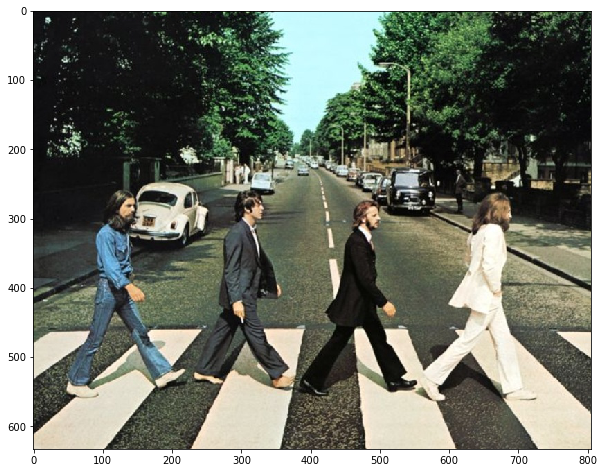

In [3]:
import cv2

cv2_image = cv2.imread("../../data/image/beatles01.jpg")
cv2.imwrite("../../data/output/beatles02_cv.jpg", cv2_image)
print('cv_image type:', type(cv2_image), ' cv_image shape:', cv2_image.shape)

plt.figure(figsize=(10, 10))
img = plt.imread("../../data/output/beatles02_cv.jpg")
plt.imshow(img)
#plt.show()


#### OpenCV의 imread()로 반환된 BGR 이미지 넘파이 배열을 그대로 시각화 하기
* OpenCV의 imread()는 RGB를 BGR로 변환하므로 원하지 않는 이미지가 출력됨

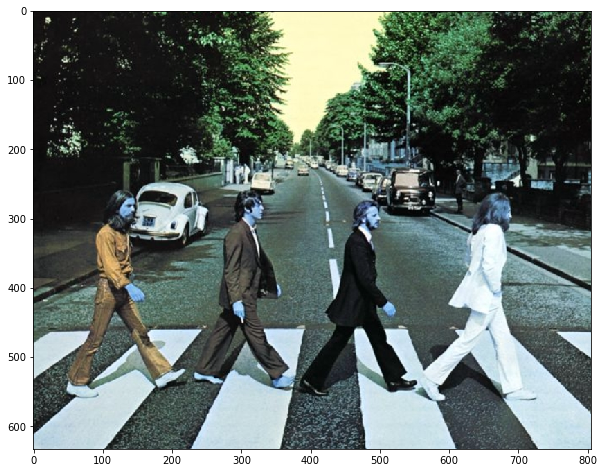

In [4]:
cv2_image = cv2.imread("../../data/image/beatles01.jpg")

plt.figure(figsize=(10, 10))
plt.imshow(cv2_image)
plt.show()

In [5]:
sk_image = io.imread("../../data/image/beatles01.jpg")
print(sk_image.shape)
sk_image[:, :, 0]

(633, 806, 3)


array([[ 18,  17,  18, ...,  46,  38,  63],
       [ 18,  18,  18, ...,  72,  41,  37],
       [ 18,  18,  18, ...,  84,  56,  42],
       ...,
       [225, 226, 228, ..., 231, 228, 229],
       [225, 225, 226, ..., 229, 229, 227],
       [225, 225, 224, ..., 227, 227, 227]], dtype=uint8)

In [6]:
cv2_image = cv2.imread("../../data/image/beatles01.jpg")
print(type(cv2_image))
print(cv2_image.shape)
cv2_image[:, :, 0]

<class 'numpy.ndarray'>
(633, 806, 3)


array([[ 19,  19,  20, ...,  47,  39,  64],
       [ 20,  20,  20, ...,  71,  40,  36],
       [ 20,  20,  20, ...,  82,  54,  40],
       ...,
       [198, 199, 201, ..., 190, 189, 188],
       [198, 198, 199, ..., 188, 188, 186],
       [199, 199, 198, ..., 186, 186, 186]], dtype=uint8)

In [7]:
cv2_image[:, :, 2]

array([[ 18,  18,  18, ...,  47,  39,  64],
       [ 19,  19,  18, ...,  72,  41,  37],
       [ 18,  18,  18, ...,  84,  56,  41],
       ...,
       [225, 226, 228, ..., 231, 230, 229],
       [225, 225, 226, ..., 229, 229, 227],
       [225, 225, 224, ..., 227, 227, 227]], dtype=uint8)

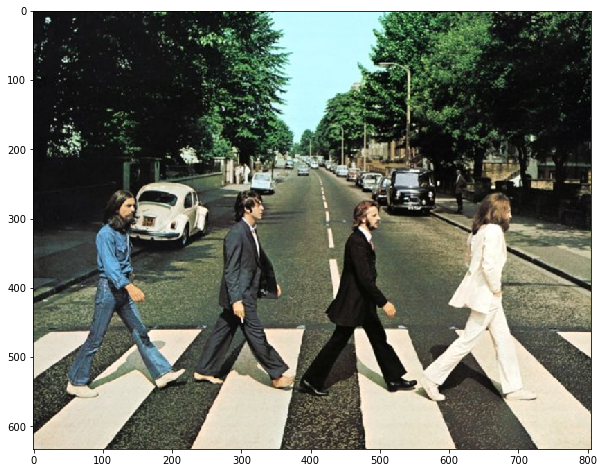

In [8]:
cv2_image = cv2.imread("../../data/image/beatles01.jpg")
draw_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(draw_image)
plt.show()

#### OpenCV 영상처리
* OpenCV는 간편하게 비디오 영상처리를 할 수 있는 API를 제공
* VideoCapture 객체는 Video Streaming을 Frame 별로 Capture하여 처리할 수 있는 기능 제공
* VideoWriter 객체는 VideoCapture로 읽어들인 Frame을 동영상으로 Write하는 기능 제공

In [13]:
# wget https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true 으로 다운로드 가능. 
from IPython.display import clear_output, Image, display, Video, HTML
Video('../../data/video/Night_Day_Chase.mp4')

In [14]:
import cv2

video_input_path = '../../data/video/Night_Day_Chase.mp4'
# linux에서 video output의 확장자는 반드시 avi 로 설정 필요. 
video_output_path = '../../data/output/Night_Day_Chase_output.avi'

cap = cv2.VideoCapture(video_input_path)
# Codec은 *'XVID'로 설정. 
codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) #(200, 400)
vid_fps = cap.get(cv2.CAP_PROP_FPS )
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame 크기:', vid_size)

총 Frame 갯수: 1383 FPS: 28 Frame 크기: (1216, 516)


In [15]:
import time

green_color=(0, 255, 0)
red_color=(0, 0, 255)

start = time.time()
index=0
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    print('frame :', index, '처리 완료')
    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    caption = "frame:{}".format(index)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)
    
    vid_writer.write(img_frame)

print('write 완료 시간:', round(time.time()-start,4))
vid_writer.release()
cap.release()   

frame : 1 처리 완료
frame : 2 처리 완료
frame : 3 처리 완료
frame : 4 처리 완료
frame : 5 처리 완료
frame : 6 처리 완료
frame : 7 처리 완료
frame : 8 처리 완료
frame : 9 처리 완료
frame : 10 처리 완료
frame : 11 처리 완료
frame : 12 처리 완료
frame : 13 처리 완료
frame : 14 처리 완료
frame : 15 처리 완료
frame : 16 처리 완료
frame : 17 처리 완료
frame : 18 처리 완료
frame : 19 처리 완료
frame : 20 처리 완료
frame : 21 처리 완료
frame : 22 처리 완료
frame : 23 처리 완료
frame : 24 처리 완료
frame : 25 처리 완료
frame : 26 처리 완료
frame : 27 처리 완료
frame : 28 처리 완료
frame : 29 처리 완료
frame : 30 처리 완료
frame : 31 처리 완료
frame : 32 처리 완료
frame : 33 처리 완료
frame : 34 처리 완료
frame : 35 처리 완료
frame : 36 처리 완료
frame : 37 처리 완료
frame : 38 처리 완료
frame : 39 처리 완료
frame : 40 처리 완료
frame : 41 처리 완료
frame : 42 처리 완료
frame : 43 처리 완료
frame : 44 처리 완료
frame : 45 처리 완료
frame : 46 처리 완료
frame : 47 처리 완료
frame : 48 처리 완료
frame : 49 처리 완료
frame : 50 처리 완료
frame : 51 처리 완료
frame : 52 처리 완료
frame : 53 처리 완료
frame : 54 처리 완료
frame : 55 처리 완료
frame : 56 처리 완료
frame : 57 처리 완료
frame : 58 처리 완료
frame : 59 처리 완료
frame 

frame : 475 처리 완료
frame : 476 처리 완료
frame : 477 처리 완료
frame : 478 처리 완료
frame : 479 처리 완료
frame : 480 처리 완료
frame : 481 처리 완료
frame : 482 처리 완료
frame : 483 처리 완료
frame : 484 처리 완료
frame : 485 처리 완료
frame : 486 처리 완료
frame : 487 처리 완료
frame : 488 처리 완료
frame : 489 처리 완료
frame : 490 처리 완료
frame : 491 처리 완료
frame : 492 처리 완료
frame : 493 처리 완료
frame : 494 처리 완료
frame : 495 처리 완료
frame : 496 처리 완료
frame : 497 처리 완료
frame : 498 처리 완료
frame : 499 처리 완료
frame : 500 처리 완료
frame : 501 처리 완료
frame : 502 처리 완료
frame : 503 처리 완료
frame : 504 처리 완료
frame : 505 처리 완료
frame : 506 처리 완료
frame : 507 처리 완료
frame : 508 처리 완료
frame : 509 처리 완료
frame : 510 처리 완료
frame : 511 처리 완료
frame : 512 처리 완료
frame : 513 처리 완료
frame : 514 처리 완료
frame : 515 처리 완료
frame : 516 처리 완료
frame : 517 처리 완료
frame : 518 처리 완료
frame : 519 처리 완료
frame : 520 처리 완료
frame : 521 처리 완료
frame : 522 처리 완료
frame : 523 처리 완료
frame : 524 처리 완료
frame : 525 처리 완료
frame : 526 처리 완료
frame : 527 처리 완료
frame : 528 처리 완료
frame : 529 처리 완료
frame : 53

frame : 952 처리 완료
frame : 953 처리 완료
frame : 954 처리 완료
frame : 955 처리 완료
frame : 956 처리 완료
frame : 957 처리 완료
frame : 958 처리 완료
frame : 959 처리 완료
frame : 960 처리 완료
frame : 961 처리 완료
frame : 962 처리 완료
frame : 963 처리 완료
frame : 964 처리 완료
frame : 965 처리 완료
frame : 966 처리 완료
frame : 967 처리 완료
frame : 968 처리 완료
frame : 969 처리 완료
frame : 970 처리 완료
frame : 971 처리 완료
frame : 972 처리 완료
frame : 973 처리 완료
frame : 974 처리 완료
frame : 975 처리 완료
frame : 976 처리 완료
frame : 977 처리 완료
frame : 978 처리 완료
frame : 979 처리 완료
frame : 980 처리 완료
frame : 981 처리 완료
frame : 982 처리 완료
frame : 983 처리 완료
frame : 984 처리 완료
frame : 985 처리 완료
frame : 986 처리 완료
frame : 987 처리 완료
frame : 988 처리 완료
frame : 989 처리 완료
frame : 990 처리 완료
frame : 991 처리 완료
frame : 992 처리 완료
frame : 993 처리 완료
frame : 994 처리 완료
frame : 995 처리 완료
frame : 996 처리 완료
frame : 997 처리 완료
frame : 998 처리 완료
frame : 999 처리 완료
frame : 1000 처리 완료
frame : 1001 처리 완료
frame : 1002 처리 완료
frame : 1003 처리 완료
frame : 1004 처리 완료
frame : 1005 처리 완료
frame : 1006 처리 완료
fra

In [16]:
!gsutil cp ../../data/output/Night_Day_Chase_output.avi gs://my_bucket_dlcv/data/output/Night_Day_Chase_output.avi

Copying file://../../data/output/Night_Day_Chase_output.avi [Content-Type=video/x-msvideo]...
/ [1 files][ 23.5 MiB/ 23.5 MiB]                                                
Operation completed over 1 objects/23.5 MiB.                                     
